# **Lenders Club ML Loan Processor**

# Imports
##### 1. Import Libraries
##### 2. Import Data

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
# Import accepted loan data
df = pd.read_csv('https://santiagox86-underwriter-1.s3.amazonaws.com/accepted_2007_to_2018Q4.csv')

D:\Programming\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Initial Exploratory Data Analysis

In [3]:
# Display data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check for nulls
pd.set_option('display.max_rows', 200)
df.isnull().sum()

id                                                  0
member_id                                     2260701
loan_amnt                                          33
funded_amnt                                        33
funded_amnt_inv                                    33
term                                               33
int_rate                                           33
installment                                        33
grade                                              33
sub_grade                                          33
emp_title                                      167002
emp_length                                     146940
home_ownership                                     33
annual_inc                                         37
verification_status                                33
issue_d                                            33
loan_status                                        33
pymnt_plan                                         33
url                         

In [5]:
# Display datatypes
df.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [6]:
# Display descriptions
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


# Data Cleaning
##### 1. Drop easily dropped data
##### 2. Analyze remaining columns
##### 3. Last round of drops
##### 4. Determine feasibility of imputing data

### Drop easily dropped data
Data that is missing target values and unnecessarily detailed features that add little to the goal of the project but with a lot of missing values can easily be dropped in this stage

In [7]:
# Drop rows with no loan_status value
df = df[df['loan_status'].notnull()]

In [8]:
# List First Round of drops
first_drop = [
 'member_id',
 'emp_title',
 'emp_length',
 'desc',
 'title',
 'last_pymnt_d',
 'next_pymnt_d',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [9]:
# Drop first round
df = df.drop(columns=first_drop)

### Analyze remaining columns
Analyze remaining columns further to determine whether columns with missing data can be dropped having similar columns that have less nulls

In [10]:
# Analyze remaining nulls
df.isnull().sum()

id                                      0
loan_amnt                               0
funded_amnt                             0
funded_amnt_inv                         0
term                                    0
int_rate                                0
installment                             0
grade                                   0
sub_grade                               0
home_ownership                          0
annual_inc                              4
verification_status                     0
issue_d                                 0
loan_status                             0
pymnt_plan                              0
url                                     0
purpose                                 0
zip_code                                1
addr_state                              0
dti                                  1711
delinq_2yrs                            29
earliest_cr_line                       29
fico_range_low                          0
fico_range_high                   

Found some columns that may have been usable features but had a significant number of nulls and had a reasonably similar feature without as many nulls. Dropping those columns.

In [11]:
# Create list of columns for second drop
second_drop = [
 'mths_since_last_delinq',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'mo_sin_old_il_acct',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_tl_120dpd_2m']

In [12]:
# Perform second column drop
df = df.drop(columns=second_drop)

### Last round of column drops
* Drop 'id' column as it adds no value to models
* Drop 'zip_code' column as zip codes are often correlated with race which could introduce racial
* Drop all date columns as the information on months since oldest account and months since most recent account are already contained in other columns
* Remove columns that contain data not available at time of loan application

In [13]:
 df.drop(columns=['id','zip_code','issue_d','earliest_cr_line','last_credit_pull_d',
                  'debt_settlement_flag','disbursement_method','hardship_flag',
                  'collection_recovery_fee','recoveries','total_pymnt',
                  'total_pymnt_inv','total_rec_prncp','total_rec_int',
                  'total_rec_late_fee','out_prncp','out_prncp_inv','installment',
                  'int_rate','funded_amnt','funded_amnt_inv','last_pymnt_amnt',
                  'grade', 'sub_grade'],inplace=True)

### Determine feasibility and necessity of imputing data
Determine whether missing data is correlated with a significant determining factor of loan repayment likelihood and whether it will be beneficial or feasible to impute that data.

In [14]:
# Check remaining column missing data
df.isnull().sum()

loan_amnt                         0
term                              0
home_ownership                    0
annual_inc                        4
verification_status               0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
addr_state                        0
dti                            1711
delinq_2yrs                      29
fico_range_low                    0
fico_range_high                   0
inq_last_6mths                   30
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                     1802
total_acc                        29
initial_list_status               0
last_fico_range_high              0
last_fico_range_low               0
collections_12_mths_ex_med      145
policy_code                       0
application_type                  0
acc_now_delinq                   29
tot_coll_amt                

After examining the rows with missing data further it seemed that certain rows that were unrelated to each other had the same data points missing. Also, a value count was run on these columns to verify that nulls were not substitutions for a value of 0 and the rows did show distinct values of 0. This leads me to conclude that the missing data in the rows does not represent a significant meaning, but rather were just uncollected, maybe from an early form that did not prompt this information from applicants. Rows are likely safe to drop. Other rows that are unrelated to these row groups contained a very small number of nulls so I will use dropna to drop the remaining rows with null values after having eliminated all unnecessary null holding columns.

In [15]:
# Drop rows with missing values
df.dropna(inplace=True)

In [16]:
# Check number of remaining rows/columns
df.shape

(2162365, 62)

In [17]:
# Verify no remaining nulls
df.isnull().sum().sum()

0

# Feature Engineering
Analyze features to manipulate data types, drop depending on usefulness of data, binarize columns, and one-hot encode features

In [18]:
# Check dtypes for columns needing modification
df.dtypes

loan_amnt                     float64
term                           object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
last_fico_range_high          float64
last_fico_range_low           float64
collections_12_mths_ex_med    float64
policy_code                   float64
application_type               object
acc_now_deli

In [19]:
# Binarize 'term' column
df['term'] = df['term'].map({' 36 months':0, ' 60 months':1})

In [20]:
# Binarize 'pymnt_plan' column
df['pymnt_plan'] = df['pymnt_plan'].map({'n':0,'y':1})

In [21]:
# 'url' column seems to be urls for specific members, redundant with 'id', drop column
df.drop(columns='url', inplace=True)

In [22]:
# Binarize 'initial_list_status' column
df['initial_list_status'] = df['initial_list_status'].map({'w':1,'f':0})

In [23]:
# Binarize 'application_type' column
df['joint_app'] = df['application_type'].map({'Individual':0, 'Joint App':1})
# Drop 'application_type' column
df.drop(columns=['application_type'], inplace=True)

In [24]:
# Get dummies for 'home_ownership' column
df = pd.get_dummies(df,columns=['home_ownership',
                                'verification_status',
                               'purpose','addr_state'],
                               drop_first=True)

# Further Exploratory Data Analysis
Re-analyze data after clean-up. Binarize the target variable 'loan_status'. And check columns that are correlated to the target.

In [25]:
df.describe()

,loan_amnt,term,annual_inc,pymnt_plan,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
count,2.162365e+06,2.162365e+06,2.162365e+06,2.162365e+06,2.162365e+06,2.162365e+06,2.162365e+06,2.162365e+06,2.162365e+06,2.162365e+06,...,2.162365e+06,2.162365e+06,2.162365e+06,2.162365e+06,2.162365e+06,2.162365e+06,2.162365e+06,2.162365e+06,2.162365e+06,2.162365e+06
mean,1.518257e+04,2.902530e-01,7.846186e+04,2.797863e-04,1.898022e+01,3.098584e-01,6.982275e+02,7.022277e+02,5.657777e-01,1.173233e+01,...,2.010761e-03,1.612447e-02,8.272331e-02,6.517864e-03,2.750831e-02,2.189270e-03,2.065285e-02,1.321054e-02,3.681617e-03,2.088454e-03
std,9.208647e+03,4.538792e-01,1.142270e+05,1.672448e-02,1.430032e+01,8.714277e-01,3.285337e+01,3.285427e+01,8.651354e-01,5.658344e+00,...,4.479642e-02,1.259543e-01,2.754636e-01,8.046977e-02,1.635592e-01,4.673840e-02,1.422193e-01,1.141754e-01,6.056455e-02,4.565187e-02
min,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.600000e+02,6.640000e+02,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,0.000000e+00,4.700000e+04,0.000000e+00,1.202000e+01,0.000000e+00,6.750000e+02,6.790000e+02,0.000000e+00,8.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.300000e+04,0.000000e+00,6.500000e+04,0.000000e+00,1.798000e+01,0.000000e+00,6.900000e+02,6.940000e+02,0.000000e+00,1.100000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+04,1.000000e+00,9.400000e+04,0.000000e+00,2.469000e+01,0.000000e+00,7.150000e+02,7.190000e+02,1.000000e+00,1.500000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+04,1.000000e+00,1.100000e+08,1.000000e+00,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,8.000000e+00,1.010000e+02,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [26]:
df.dtypes

loan_amnt                              float64
term                                     int64
annual_inc                             float64
loan_status                             object
pymnt_plan                               int64
dti                                    float64
delinq_2yrs                            float64
fico_range_low                         float64
fico_range_high                        float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
initial_list_status                      int64
last_fico_range_high                   float64
last_fico_range_low                    float64
collections_12_mths_ex_med             float64
policy_code                            float64
acc_now_delinq                         float64
tot_coll_amt 

In [27]:
# Analyze target column 'loan_status'
df['loan_status'].value_counts()

Fully Paid            1007474
Current                866111
Charged Off            255027
Late (31-120 days)      21123
In Grace Period          8308
Late (16-30 days)        4284
Default                    38
Name: loan_status, dtype: int64

Binarize 'loan_status' column into Good=1 and Bad=0 loans with bad loans beng defined as loans that have gone into default, been written off, or are more than 30 days behind in payment. 

In [28]:
# Use .map to binarize 'loan_status' column
df['loan_status'] = df['loan_status'].map({'Fully Paid':1,
                                           'Current':1,
                                           'Charged Off':0,
                                           'Late (31-120 days)':0,
                                           'In Grace Period':1,
                                           'Late (16-30 days)':1,
                                           'Default':0})

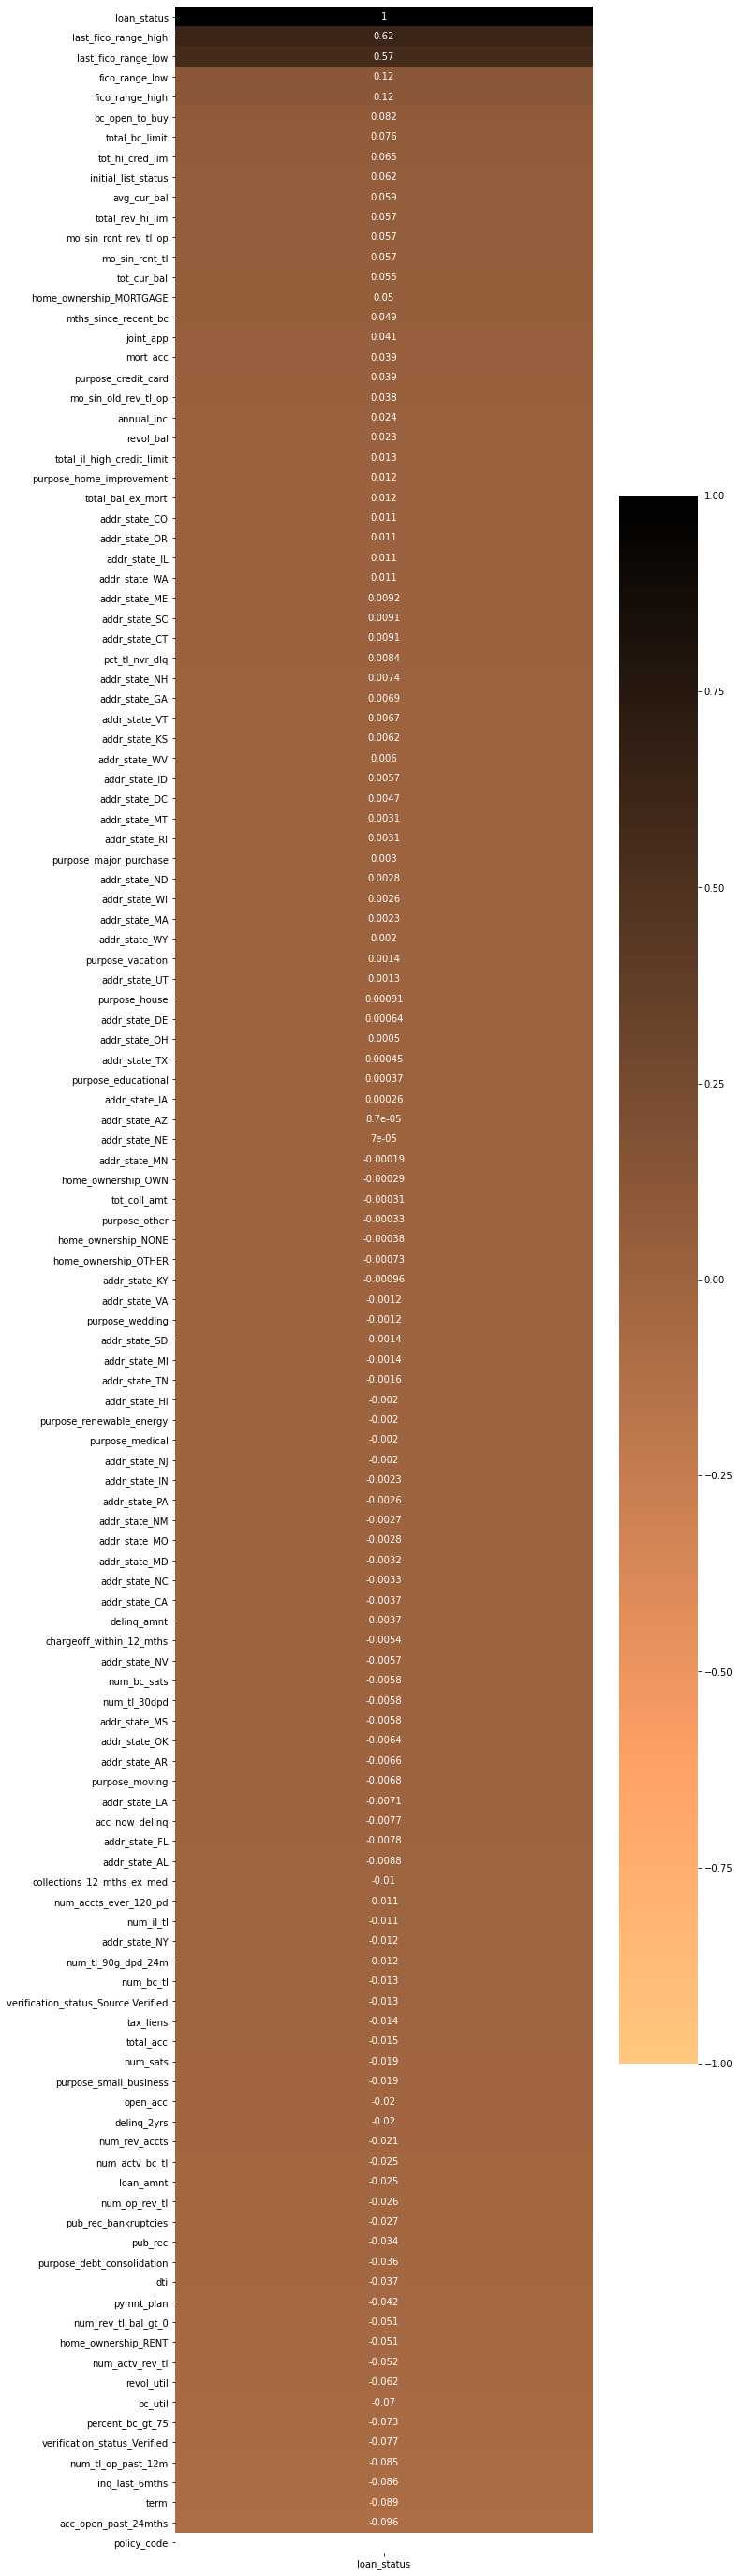

In [29]:
plt.figure(figsize=(10,50))
sns.heatmap(df.corr()[['loan_status']].sort_values('loan_status',ascending = False,),
            annot=True,
            cmap='copper_r',
            vmin=-1,
            vmax=1);

In [30]:
df

,loan_amnt,term,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,3600.0,0,55000.0,1,0,5.91,0.0,675.0,679.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,24700.0,0,65000.0,1,0,16.06,1.0,715.0,719.0,4.0,...,1,0,0,0,0,0,0,0,0,0
2,20000.0,1,63000.0,1,0,10.78,0.0,695.0,699.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,35000.0,1,110000.0,1,0,17.06,0.0,785.0,789.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,10400.0,1,104433.0,1,0,25.37,1.0,695.0,699.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260693,24000.0,1,125000.0,1,0,10.98,0.0,725.0,729.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2260695,24000.0,1,108000.0,1,0,34.94,0.0,695.0,699.0,1.0,...,0,0,0,1,0,0,0,0,0,0
2260696,40000.0,1,227000.0,1,0,12.75,7.0,705.0,709.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2260697,24000.0,1,110000.0,0,0,18.30,0.0,660.0,664.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.to_csv('./data/cleaned_df.csv', index=False)